In [37]:
#použité knižnice

import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import spectrogram, lfilter, freqz, tf2zpk
from scipy.io import wavfile

In [38]:
print('Úloha 4.1\n')

#Načítanie vstupného signálu

s, fs = sf.read('xkovac59.wav')
s = s[:250000]

#vypísanie dĺžok
print(f'Dĺžka vo vzorkoch = {s.size}')
t = s.size / fs
print(f'Dĺžka v sekundách = {t}\n')

#vypísanie minimálnej a maximálnej hodnoty
print(f'(minimum, maximum) = {s.min(), s.max()}')

Úloha 4.1

Dĺžka vo vzorkoch = 74752
Dĺžka v sekundách = 4.672

(minimum, maximum) = (-0.084442138671875, 0.109954833984375)


Zobrazenie grafu vstupného signálu xkovac59.wav:


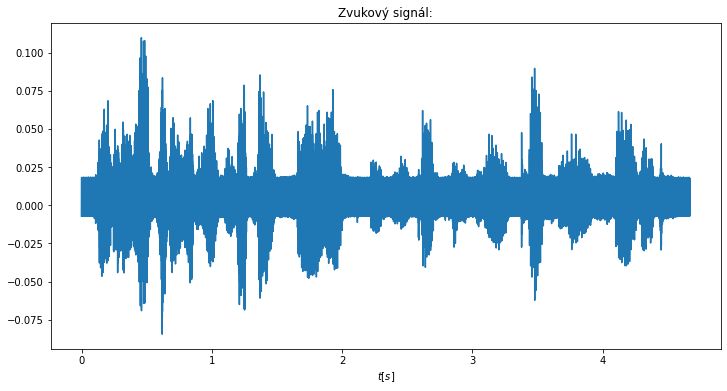

In [39]:
print('Zobrazenie grafu vstupného signálu xkovac59.wav:')
plt.figure(figsize=(12,6))
t = np.arange(s.size) / fs
plt.plot(t, s)
plt.gca().set_xlabel('$t[s]$')
_ = plt.gca().set_title('Zvukový signál:')

In [40]:
#ustrednení - odečtení strední hodnoty
s = s - np.mean(s)
#signal je normalizivaný do dynamického rozsahu -1 1 už od prvého tasku kvôli použitu sf.read()

Úloha 4.2
Zobrazenie znelého rámca s periodickým charakterom:


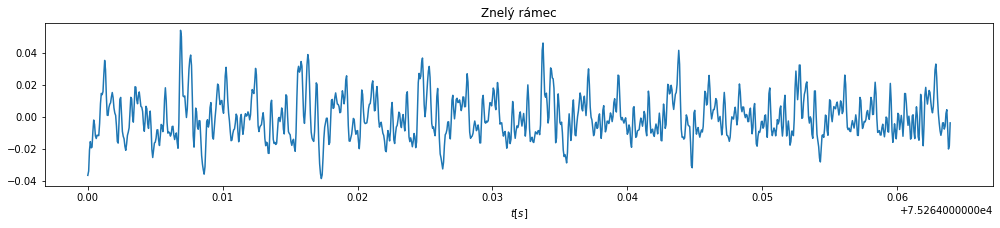

In [41]:
#rozdelenie na rámce
frames = []
i = 0
j = 1024
while i <= 74752:
    frames.append(s[i:j])
    i += 512
    j += 512

#výber znelého rámca
plt.figure(figsize=(17,3))
plt.plot(np.arange(frames[22].size)/fs+i, frames[22])
plt.gca().set_xlabel('$t[s]$')
plt.gca().set_title('Znelý rámec')

print('Úloha 4.2')
print('Zobrazenie znelého rámca s periodickým charakterom:')

Úloha 4.3



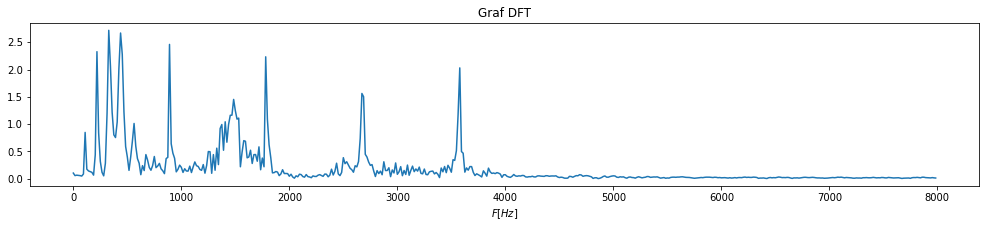

In [42]:
print('Úloha 4.3\n') #hotová len druhá časť
var = np.fft.fft(s)
var2 = np.fft.fft(frames[22])

plt.figure(figsize=(17,3))
yaxis = var2[0:(var2.size//2)]
xaxis = np.arange(0, fs/2, fs/1024)

plt.plot(xaxis, np.abs(yaxis))
plt.gca().set_xlabel('$F[Hz]$')
_ = plt.gca().set_title('Graf DFT')

Úlohy 4.4 a 4.5

Určenie rušivých frekvencií pomocou spektogramu:

f1 = 900 Hz
f2 = 1800 Hz
f3 = 2700 HZ
f4 = 3600 Hz

Cosinusovky sú harmonicky vzťažené - f2, f3 a f4 sú násobkami f1.

Zobrazenie spektogramu celého signálu:


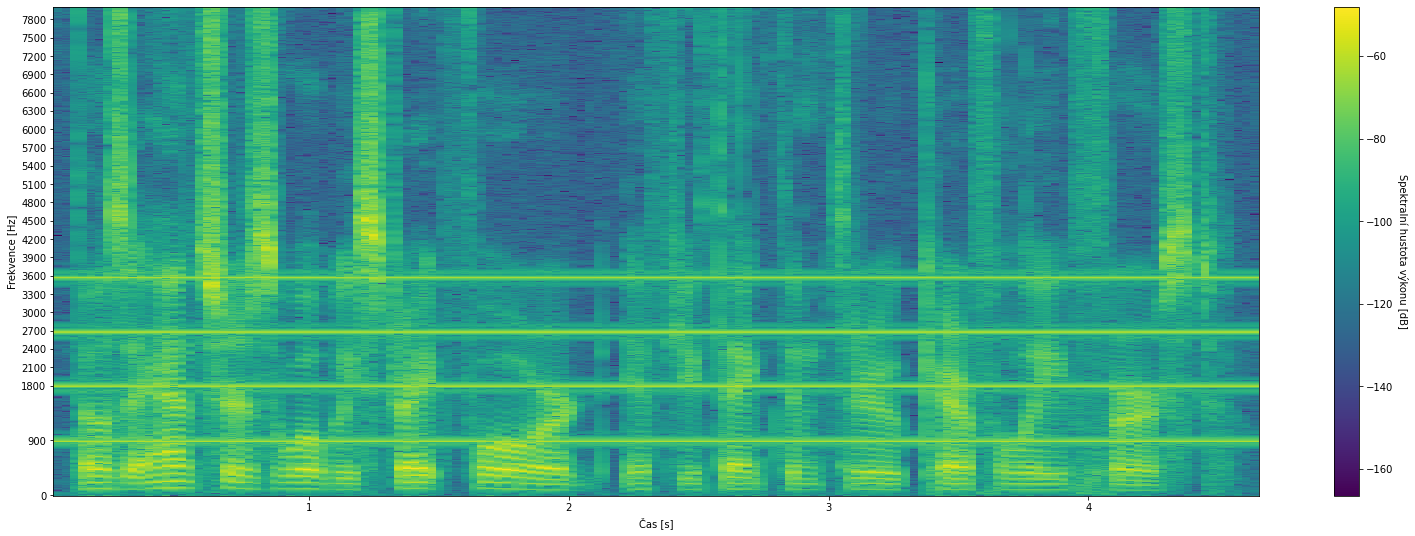

In [43]:
print('Úlohy 4.4 a 4.5\n')

f, t, sgr = spectrogram(s, fs, nperseg=1024, noverlap=512)
sgr_log = 10 * np.log10(sgr+1e-20)

plt.figure(figsize=(27,9))
plt.pcolormesh(t,f,sgr_log)
plt.yticks(np.append(np.array([0, 900]), np.arange(1800, 8000, 300)))
plt.gca().set_xlabel('Čas [s]')
plt.gca().set_ylabel('Frekvence [Hz]')
cbar = plt.colorbar()
cbar.set_label('Spektralní hustota výkonu [dB]', rotation=270, labelpad=15)

#určenie rušivých frekvencií - ručne pomocou odčítania z grafu

print('Určenie rušivých frekvencií pomocou spektogramu:\n')
print('f1 = 900 Hz')
print('f2 = 1800 Hz')
print('f3 = 2700 HZ')
print('f4 = 3600 Hz')
print("\nCosinusovky sú harmonicky vzťažené - f2, f3 a f4 sú násobkami f1.\n")

print('Zobrazenie spektogramu celého signálu:')

Úloha 4.6

Pomocou vypočutia nahrávky a porovnania spektogramov vieme povedať, že je signál vygenerovaný správne.


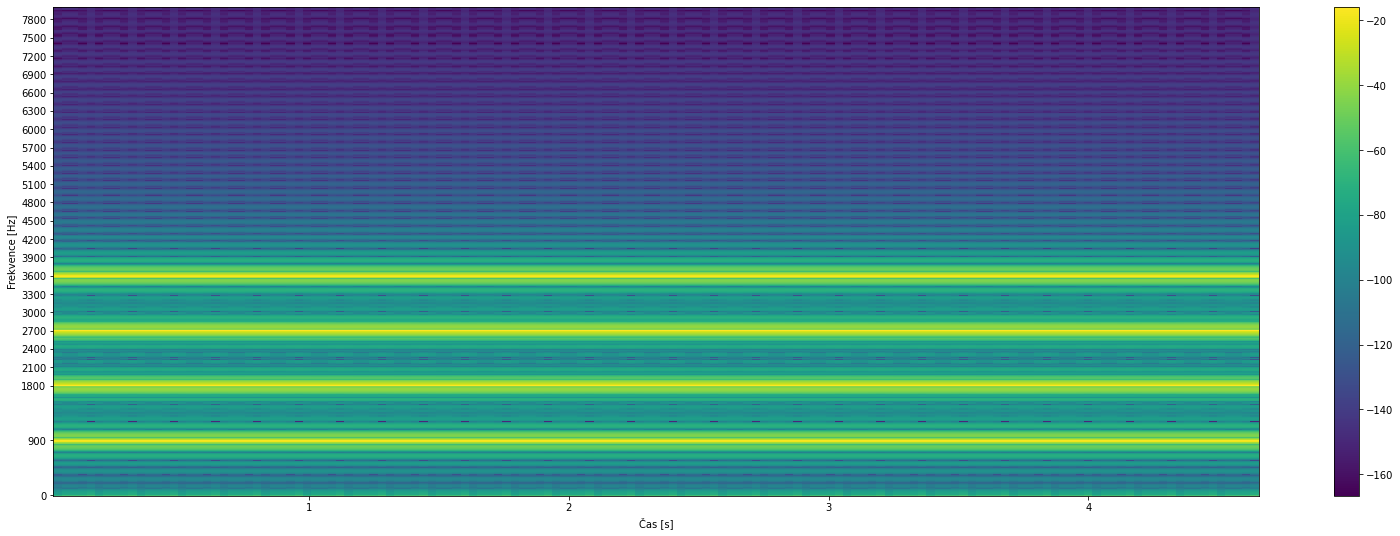

In [44]:
print('Úloha 4.6\n')

f1 = 900
f2 = 1800
f3 = 2700
f4 = 3600

fSamples = []

for i in range(74752):
  fSamples.append(i/fs)

#cosinusovky

cos_f1 = np.cos(2*np.pi*f1*np.array(fSamples))
cos_f2 = np.cos(2*np.pi*f2*np.array(fSamples))
cos_f3 = np.cos(2*np.pi*f3*np.array(fSamples))
cos_f4 = np.cos(2*np.pi*f4*np.array(fSamples))

#generovanie signálu so smesou 4 cosinusoviek

wav = cos_f1+cos_f2+cos_f3+cos_f4
wavfile.write("4cos.wav", fs, wav.astype(np.float32))

#zobrazenie spektogramu vygenerovaného signálu

f, t, sgr = spectrogram(wav, fs, nperseg=1024, noverlap=512)
sgr_log = 10 * np.log10(sgr+1e-20)

plt.figure(figsize=(27,9))
plt.pcolormesh(t,f,sgr_log)
plt.yticks(np.append(np.array([0, 900]), np.arange(1800, 8000, 300)))
plt.gca().set_xlabel('Čas [s]')
plt.gca().set_ylabel('Frekvence [Hz]')
cbar = plt.colorbar()

print('Pomocou vypočutia nahrávky a porovnania spektogramov vieme povedať, že je signál vygenerovaný správne.')

In [45]:
from scipy.signal import buttord, butter

print('Úloha 4.7 - alternativa 3. (Návrh pásmových zádrží)\n')

#filter f1
N1, Wn1 = buttord([(f1-90)/(fs/2), (f1+90)/(fs/2)], [(f1-30)/(fs/2), (f1+30)/(fs/2)], 30, 50)
b1, a1 = butter(N1, Wn1, 'bandstop')

#filter f2
N2, Wn2 = buttord([(f2-90)/(fs/2), (f2+90)/(fs/2)], [(f2-30)/(fs/2), (f2+30)/(fs/2)], 30, 50)
b2, a2 = butter(N2, Wn2, 'bandstop')

#filter f3
N3, Wn3 = buttord([(f3-90)/(fs/2), (f3+90)/(fs/2)], [(f3-30)/(fs/2), (f3+30)/(fs/2)], 30, 50)
b3, a3 = butter(N3, Wn3, 'bandstop')

#filter f4
N4, Wn4 = buttord([(f4-90)/(fs/2), (f4+90)/(fs/2)], [(f4-30)/(fs/2), (f4+30)/(fs/2)], 30, 50)
b4, a4 = butter(N4, Wn4, 'bandstop')

Úloha 4.7 - alternativa 3. (Návrh pásmových zádrží)



Úloha 4.8



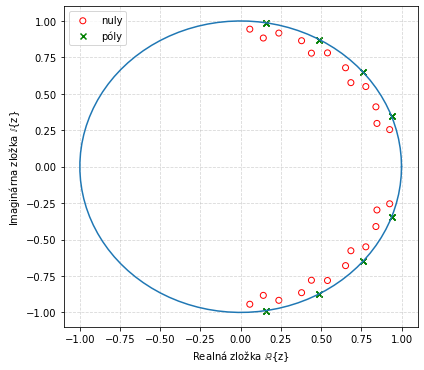

In [46]:
print('Úloha 4.8\n')

#nuly a póly
zeros1, poles1, k1 = tf2zpk(a1, b1)
zeros2, poles2, k2 = tf2zpk(a2, b2)
zeros3, poles3, k3 = tf2zpk(a3, b3)
zeros4, poles4, k4 = tf2zpk(a4, b4)



plt.figure(figsize=(6,5.25))

# graf - časť jednotková kružnica
ang = np.linspace(0, 2*np.pi,100)
plt.plot(np.cos(ang), np.sin(ang))

plt.scatter(np.real(zeros1), np.imag(zeros1), marker='o', facecolors='none', edgecolors='r', label='nuly')
plt.scatter(np.real(poles1), np.imag(poles1), marker='x', color='g', label='póly')

plt.legend(loc='upper left')

plt.scatter(np.real(zeros2), np.imag(zeros2), marker='o', facecolors='none', edgecolors='r', label='nuly')
plt.scatter(np.real(poles2), np.imag(poles2), marker='x', color='g', label='póly')

plt.scatter(np.real(zeros3), np.imag(zeros3), marker='o', facecolors='none', edgecolors='r', label='nuly')
plt.scatter(np.real(poles3), np.imag(poles3), marker='x', color='g', label='póly')

plt.scatter(np.real(zeros4), np.imag(zeros4), marker='o', facecolors='none', edgecolors='r', label='nuly')
plt.scatter(np.real(poles4), np.imag(poles4), marker='x', color='g', label='póly')

plt.gca().set_xlabel('Realná zložka $\mathbb{R}\{$z$\}$')
plt.gca().set_ylabel('Imaginárna zložka $\mathbb{I}\{$z$\}$')

plt.grid(alpha=0.5, linestyle='--')

plt.tight_layout()

In [ ]:
print('Úloha 4.9\n')

# frekvencni charakteristika
w1, H1 = freqz(b1, a1)
w2, H2 = freqz(b2, a2)
w3, H3 = freqz(b3, a3)
w4, H4 = freqz(b4, a4)

_, ax = plt.subplots(1, 2, figsize=(8,3))

ax[0].plot(w1 / 2 / np.pi * fs, np.abs(H1))
ax[0].set_xlabel('Frekvence [Hz]')
ax[0].set_title('Modul frekvenční charakteristiky f1 $|H(e^{j\omega})|$')

ax[1].plot(w1 / 2 / np.pi * fs, np.angle(H1))
ax[1].set_xlabel('Frekvence [Hz]')
ax[1].set_title('Argument frekvenční charakteristiky f1 $\mathrm{arg}\ H(e^{j\omega})$')

for ax1 in ax:
    ax1.grid(alpha=0.5, linestyle='--')

plt.tight_layout()

_, ax = plt.subplots(1, 2, figsize=(8,3))

ax[0].plot(w2 / 2 / np.pi * fs, np.abs(H2))
ax[0].set_xlabel('Frekvence [Hz]')
ax[0].set_title('Modul frekvenční charakteristiky f2 $|H(e^{j\omega})|$')

ax[1].plot(w2 / 2 / np.pi * fs, np.angle(H2))
ax[1].set_xlabel('Frekvence [Hz]')
ax[1].set_title('Argument frekvenční charakteristiky f2 $\mathrm{arg}\ H(e^{j\omega})$')

for ax1 in ax:
    ax1.grid(alpha=0.5, linestyle='--')

plt.tight_layout()

_, ax = plt.subplots(1, 2, figsize=(8,3))

ax[0].plot(w3 / 2 / np.pi * fs, np.abs(H3))
ax[0].set_xlabel('Frekvence [Hz]')
ax[0].set_title('Modul frekvenční charakteristiky f3 $|H(e^{j\omega})|$')

ax[1].plot(w3 / 2 / np.pi * fs, np.angle(H3))
ax[1].set_xlabel('Frekvence [Hz]')
ax[1].set_title('Argument frekvenční charakteristiky f3 $\mathrm{arg}\ H(e^{j\omega})$')

for ax1 in ax:
    ax1.grid(alpha=0.5, linestyle='--')

plt.tight_layout()

_, ax = plt.subplots(1, 2, figsize=(8,3))
ax[0].plot(w4 / 2 / np.pi * fs, np.abs(H4))
ax[0].set_xlabel('Frekvence [Hz]')
ax[0].set_title('Modul frekvenční charakteristiky f4 $|H(e^{j\omega})|$')

ax[1].plot(w4 / 2 / np.pi * fs, np.angle(H4))
ax[1].set_xlabel('Frekvence [Hz]')
ax[1].set_title('Argument frekvenční charakteristiky f4 $\mathrm{arg}\ H(e^{j\omega})$')

for ax1 in ax:
    ax1.grid(alpha=0.5, linestyle='--')

plt.tight_layout()

print('Z grafu vieme vyčítať, že filtre potlačujú rušivý signál na správnych frekvenciách.')

Úloha 4.9



In [ ]:
print('Úloha 4.10\n')

#postupná filtrácia cez všetky 4 filtre
sf1 = lfilter(b1, a1, s)
sf2 = lfilter(b2, a2, sf1)
sf3 = lfilter(b3, a3, sf2)
sfinal = lfilter(b4, a4, sf3) #po aplikácii 4. filtru už je final, nepotrebujeme aj sf4 lebo ten je posledný

print(f'Signál je vo slušnom dynamickom rozsahu: {sfinal.min(), sfinal.max()}.')

#nahrávka po odfiltrovaní
sf.write("clean_bandstop.wav", sfinal.astype(np.float32), fs)

print('Filtrovanie signálu považujem za úspešné, po vypočutí nahrávky nie je počuť rušivé signály, ale čistá a zrozumiteľná reč.')